# Statistics and data science

In [167]:
import numpy as np
import pandas as pd
from scipy import stats
titanic = pd.read_csv('titanic.csv') # Example from https://github.com/pandas-dev/pandas/tree/master/doc/data

## Estimates of Location


| Estimates of Location | Robust | Notes                          |
| --------------------- | ------ | -------------------------------|
| Mean                  | N      |                                |
| Weighted mean         | N      |                                |
| Median                | Y      |                                |
| Weighted median       | Y      |                                |
| Trimmed mean          | Y      | used more data which is better |

### Mean

In [168]:
titanic['Age'].mean()

29.69911764705882

### Median

In [169]:
titanic['Age'].median()

28.0

### Trimmed mean

In [170]:
stats.trim_mean(titanic['Age'].fillna(0), 0.10)

22.750589060308556

In [171]:
stats.trim_mean(titanic['Age'].fillna(200), 0.1)

53.54908835904628

Filling with zeros or an impossible age (200 years) alters significantly the value of the trim mean (so it should not be used). Instead we could drop rows with NaN in the specific column 'Age'

In [172]:
titanicWithAge = titanic.dropna(subset=['Age'])
stats.trim_mean(titanicWithAge['Age'], 0.10)

29.26923076923077

The **mean** is bigger than the **trimmed mean**, which is bigger than the **median**.

### Weighted mean

In [173]:
np.average(titanicWithAge['Age'], weights=titanicWithAge['Pclass'])

27.691822166562307

In this case, if we give more weight to passengers with cheaper tickets (2nd and 3nd class), we are getting a lower mean value (younger people)

## Deviations

### Standard deviation

In [174]:
titanic['Age'].std()

14.526497332334044

### Quantiles and Boxplots

In [175]:
titanic['Age'].quantile(0.75)-titanic['Age'].quantile(0.25) 

17.875

Variance and standard deviation are both sensitive to outliers. 
More robust metrics include mean absolute deviation, median absolute deviation and percentiles (quantiles).


In [176]:
titanic['Age'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05     4.000
0.25    20.125
0.50    28.000
0.75    38.000
0.95    56.000
Name: Age, dtype: float64

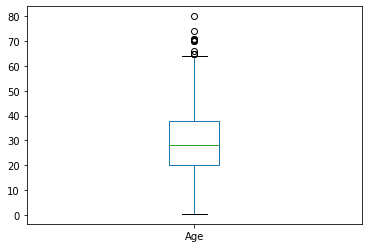

In [177]:
(titanic['Age']).plot.box()

### Frequency Tables and histograms

In [178]:
pd.cut(titanic['Age'], 10).value_counts()

(16.336, 24.294]    177
(24.294, 32.252]    169
(32.252, 40.21]     118
(40.21, 48.168]      70
(0.34, 8.378]        54
(8.378, 16.336]      46
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: Age, dtype: int64

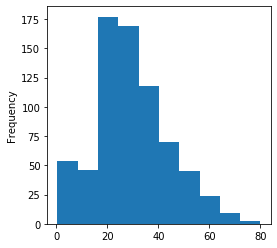

In [179]:
 (titanic['Age']).plot.hist(figsize=(4, 4))


Location and variability are referred to as the first and second moments of a distribution. 

###  Density Plots and Estimates

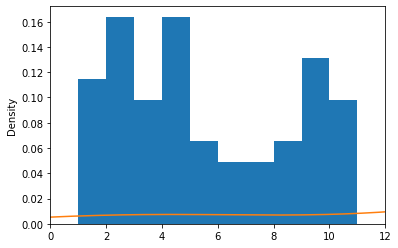

In [180]:
ax = titanic['Age'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
titanic['Age'].plot.density(ax=ax)